# Движение кометы в поле тяготения Солнца

Введите r0, v0 и угол между ними, а так же массу звезды в млн кг
aaa
2.1563165785528287


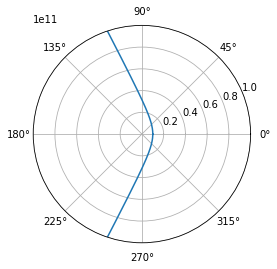

' theta = np.linspace(0, 2 * np.pi, 100)\nro = 1 / (1 + 1 * np.cos(theta))\nplt.figure()\nplt.polar(theta, ro)\nax = plt.gca()\nax.set_ylim([0, 4])\nplt.show() '

In [190]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

print("Введите r0, v0 и угол между ними, а так же массу звезды в млн кг")
r0 = 10 ** 12
v0 = 2000#вот эти два параметра очень чувствительны. На порядок больше - и уже линия, а не овал
alpha = 90 / 180 * pi

M = 1.9 * (10 ** 30)
G = 6.67 * (10 ** (-11))
Lm = r0 * v0 * sin(alpha)#удельный момент импульса (момент импулься приходящийся на m)
e = sqrt(1 + (v0**2 - 2 * G * M / r0) * Lm**2 / (G**2 * M**2))
if (e > 1): print("aaa")
print(e)
def r(theta):
    return Lm**2 / (G * M * (1 + e * np.cos(theta)))

theta = np.linspace(0, 2 * np.pi, 1000)
ro = r(theta)
plt.figure()
plt.polar(theta, ro)
ax = plt.gca()
ax.set_ylim([0, 10**11])
plt.show()

""" theta = np.linspace(0, 2 * np.pi, 100)
ro = 1 / (1 + 1 * np.cos(theta))
plt.figure()
plt.polar(theta, ro)
ax = plt.gca()
ax.set_ylim([0, 4])
plt.show() """

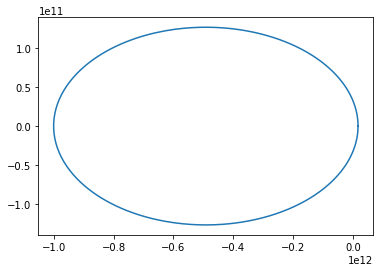

In [66]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt


M = 1.9 * (10 ** 30)
G = 6.67 * (10 ** (-11))


def r(theta):
    return L_m ** 2 / (G * M * (1 + e * np.cos(theta)))


def polar_to_cartesian(rho, theta):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

# Входные данные
r_0 = 10 ** 12
v_0 = 2000
alpha = pi / 2

L_m = r_0 * v_0 * np.sin(alpha)
e = np.sqrt(1 + (v_0 ** 2 - 2 * G * M / r_0) * L_m ** 2 / (G ** 2 * M ** 2))

theta = np.linspace(0, 2 * np.pi, 1000)
rho = r(theta)
x, y = polar_to_cartesian(rho, theta)

plt.figure()
plt.plot(x, y)
plt.show()

Финальное моделирование

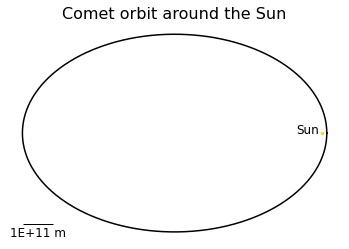

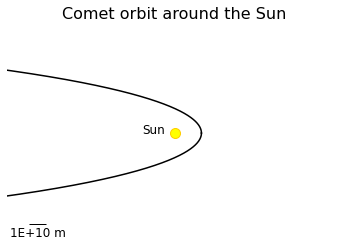

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from decimal import Decimal
from matplotlib.animation import FuncAnimation, writers


FRAMES = 100
ITERATIONS = 10_000

M = 1.9 * (10 ** 30)
G = 6.67 * (10 ** (-11))

prev_point1 = None


def r(theta):
    return L_m ** 2 / (G * M * (1 + e * np.cos(theta)))


def polar_to_cartesian(rho, theta):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y


def init_plot1():
    axes.set_title("Comet orbit around the Sun", size=16)
    axes.axis("off")
    axes.plot(x, y, c="#000000")
    axes.scatter(0, 0, 5, c="#ffff00", linewidths=1, edgecolors="#ffcc00")
    scalebar = AnchoredSizeBar(axes.transData,
                            r_0 // 10, f"{Decimal(r_0 // 10):.0E} m", "lower left", 
                            pad=0.1,
                            color="#000000",
                            frameon=False,
                            size_vertical=1,
                            fontproperties=fontprops)

    axes.add_artist(scalebar)
    axes.annotate("Sun", (0, 0), xytext=(-26, 0), textcoords="offset pixels", fontproperties=fontprops)
    return axes


def animate_plot1(i):
    global prev_point1
    x_coord, y_coord = x[i * (ITERATIONS // FRAMES)], y[i * (ITERATIONS // FRAMES)]
    if prev_point1 is not None:
        prev_point1.remove()
    prev_point1 = axes.scatter(mirrored_axis - x_coord, y_coord, 10, c="#000000")
    return axes


def init_plot2():
    axes.set_title("Comet orbit around the Sun", size=16)
    axes.axis("off")
    axes.plot(x, y, c="#000000")
    axes.scatter(0, 0, 100, c="#ffff00", linewidths=1, edgecolors="#ffcc00")
    scalebar = AnchoredSizeBar(axes.transData,
                            r_0 // 100, f"{Decimal(r_0 // 100):.0E} m", "lower left", 
                            pad=0.1,
                            color="#000000",
                            frameon=False,
                            size_vertical=1,
                            fontproperties=fontprops)

    axes.add_artist(scalebar)
    axes.annotate("Sun", (0, 0), xytext=(-32, 0), textcoords="offset pixels", fontproperties=fontprops)
    axes.set_xlim([-r_0 // 10, r_0 // 10])


# Входные данные
r_0 = 10 ** 12
v_0 = 2000
alpha = np.pi / 2

L_m = r_0 * v_0 * np.sin(alpha)
e = np.sqrt(1 + (v_0 ** 2 - 2 * G * M / r_0) * L_m ** 2 / (G ** 2 * M ** 2))

theta = np.linspace(0, 2 * np.pi, ITERATIONS)
rho = r(theta)
x, y = polar_to_cartesian(rho, theta)
mirrored_axis = min(x) + max(x)

fontprops = fm.FontProperties(size=12)

# plot 1
fig, axes = plt.subplots()
init_plot1()
animation = FuncAnimation(fig, animate_plot1, frames=FRAMES, interval=50)
animation.save("plot1.gif", writer="ffmpeg", dpi=120)
prev_point1.remove()
fig.savefig("plot1.png")

# plot 2
fig, axes = plt.subplots()
init_plot2()
fig.savefig("plot2.png")